In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [5]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\MADHU\Desktop\house_prices.csv")

In [7]:
# Step 3: Inspect Dataset
print("Dataset Info:")
print(df.info())
print("\nDataset Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())  # Check for missing values

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   square feet      545 non-null    int64 
 1   Category         545 non-null    object
 2   Number of rooms  545 non-null    int64 
 3   price            545 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.2+ KB
None

Dataset Summary:
        square feet  Number of rooms         price
count    545.000000       545.000000  5.450000e+02
mean    5150.541284         2.965138  4.766729e+06
std     2170.141023         0.738064  1.870440e+06
min     1650.000000         1.000000  1.750000e+06
25%     3600.000000         2.000000  3.430000e+06
50%     4600.000000         3.000000  4.340000e+06
75%     6360.000000         3.000000  5.740000e+06
max    16200.000000         6.000000  1.330000e+07

Missing Values:
square feet        0
Category           0
Number of rooms    0

In [9]:
df.dropna(inplace=True)  # Handle missing values by dropping them

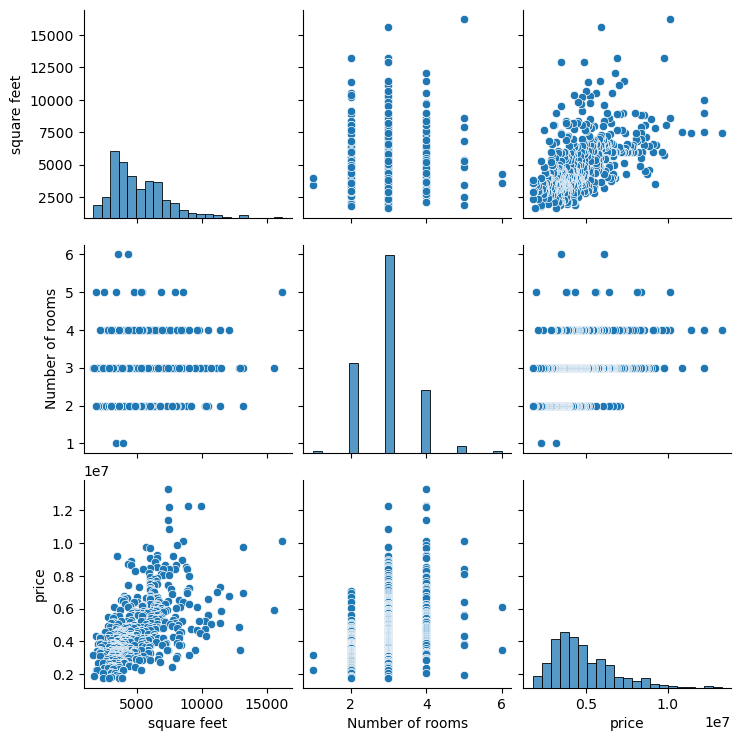

In [11]:
# Step 4: Visualize Distributions
sns.pairplot(df)
plt.show()

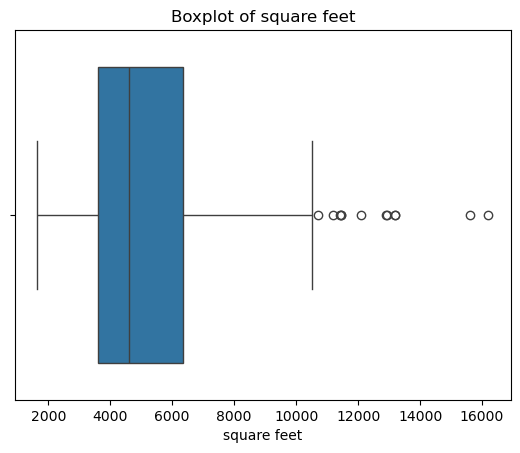

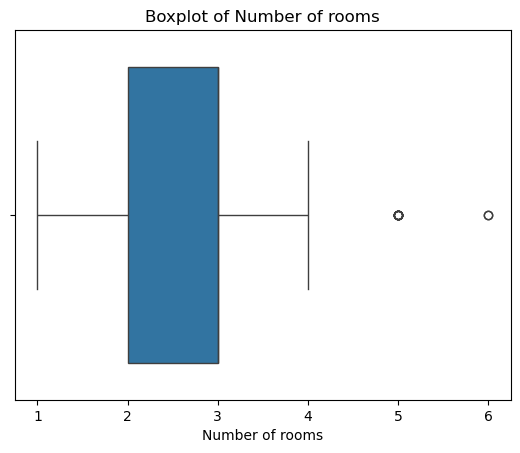

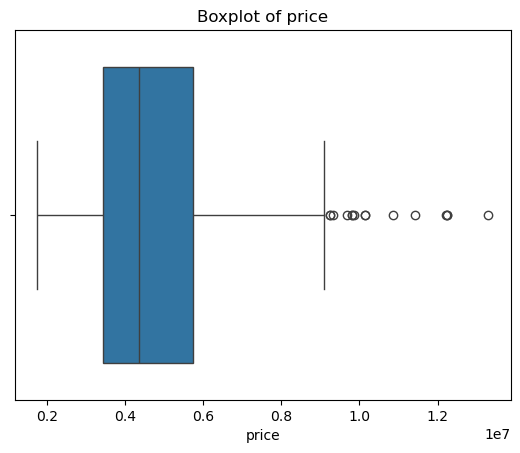

In [19]:
# Step 5: Identify Outliers
for col in ["square feet", "Number of rooms", "price"]:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [23]:
# Step 6: Feature Engineering
numeric_features = ["square feet", "Number of rooms"]
categorical_features = ["Category"]

In [25]:
# Step 7: Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", MinMaxScaler(), numeric_features),
        ("cat", OneHotEncoder(drop='first'), categorical_features),
    ]
)

In [29]:
# Step 8: Define Features and Target
X = df.drop(columns=["price"])
y = df["price"]

In [31]:
# Step 9: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Step 10: Model Pipeline
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [35]:
# Step 11: Train Model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['square feet',
                                                   'Number of rooms']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Category'])])),
                ('regressor', LinearRegression())])

In [37]:
# Step 12: Make Predictions
y_pred = model.predict(X_test)

In [39]:
# Step 13: Evaluate Model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [41]:
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 1821862.54581173
R² Score: 0.3433302983132839


In [43]:
# Step 14: Feature Importance Analysis
coefficients = model.named_steps["regressor"].coef_
feature_names = numeric_features + list(model.named_steps["preprocessor"].transformers_[1][1].get_feature_names_out())
feature_importance = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
print("Feature Importance:")
print(feature_importance.sort_values(by="Coefficient", ascending=False))

Feature Importance:
             Feature   Coefficient
0        square feet  5.089349e+06
1    Number of rooms  3.127767e+06
2  Category_suburban -8.867206e+05
3     Category_urban -1.282000e+06
